### Chapter 4.2 
# M/M/n Delay System

---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---

The M/M/n delay system represents a fundamental queueing system. The steady state probabilities $x(i)$ for $i=0,...,n$ can be derived based on the analysis of Markov systems. The system consists of $n$ parallel servers and an infinite waiting room. Customers arrive according to a Poisson process with rate $\lambda$. The service time $B$ is exponentially distributed with mean $E[B]=1/\mu$.

## State Probability
The offered load is $a=\lambda E[B]=\frac{\lambda}{\mu}$. The utilization is identical to the normalized offered traffic $\rho=a/n$. The state probabilities are:

$
  x(i)  = \begin{cases}
           x(0) \displaystyle\frac{a^i}{i!} \; , & i=0,1,...,n\\
           \\
           x(0) \displaystyle\frac{a^n}{n!} \left({\frac{a}{n}}
           \right)^{i-n} =
               x(n) {\rho}^{i-n} \; , & i>n
                 \end{cases} \\
 \Big(x(0)\Big)^{-1} = \displaystyle\sum\limits_{k=0}^{n-1}\frac{a^k}{k!} +
                 \frac{a^n}{n!} \frac{1}{1-\rho}\;.
$

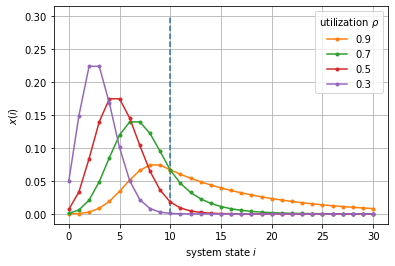

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, binom, factorial

# State probabilites
def mmn_delay_xi(n,a,xmax): # computation for M/M/n system and single value of n
    rho = a/n
    xi = np.zeros(xmax+1)
    k = np.arange(0,n)
    tmp = np.sum(a**k/factorial(k))+a**n/factorial(n)/(1-rho)
    xi[0] = 1.0 / tmp
    
    k = np.arange(1,n+1)
    xi[k] = xi[0]*a**k/factorial(k)
    
    k = np.arange(n+1, xmax+1)
    xi[k] = xi[n]*rho**(k-n)    
    
    return xi


rhos = np.array([0.3, 0.5, 0.7, 0.9])[::-1]
n = 10
xmax = 30
i = np.arange(xmax+1)
ymax = 0.3
offeredLoad = rhos*n


plt.plot([n,n],[0,ymax],'--')

for k, (rho,a) in enumerate(zip(rhos,offeredLoad)):        
    plt.plot(i, mmn_delay_xi(n,a,xmax), '.-', label=rho)

plt.xlabel('system state $i$')
plt.ylabel('$x(i)$')
plt.grid(which='major')
plt.legend(title='utilization $\\rho$');

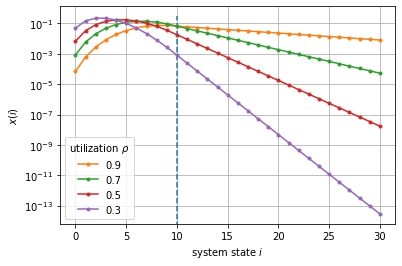

In [6]:
# logarithmic scale with geometric trail

plt.plot([n,n],[0,ymax],'--')

for k, (rho,a) in enumerate(zip(rhos,offeredLoad)):        
    plt.plot(i, mmn_delay_xi(n,a,xmax), '.-', label=rho)

plt.xlabel('system state $i$')
plt.ylabel('$x(i)$')
plt.grid(which='major')
plt.legend(title='utilization $\\rho$');
plt.yscale('log')

## Waiting Probability
An arriving customer has to enter the queue when all servers are occupied at the time of arrival. The corresponding waiting probability $p_W$ is thus

$
 p_W = \sum\limits_{i=n}^{\infty} x(i)
     \, = \, x(n)\sum\limits_{i=0}^{\infty} {\rho}^i
     \, = \, x(n) \; \frac{1}{1-\rho}
$

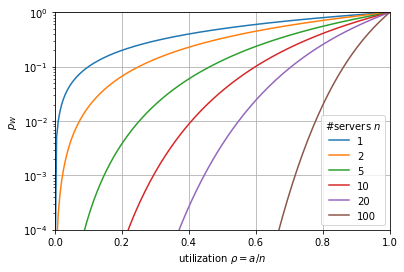

In [13]:
def pw(a, n):        
    xi = mmn_delay_xi(n,a,n)
    return xi[n]/(1-a/n)

rhos = np.linspace(1e-5,1-1e-5,201)
myn =  np.array([1,2,5,10,20,100])
pws = np.zeros((len(myn),len(rhos)))
for i,rho in enumerate(rhos):
    for k,n in enumerate(myn):
        a = rho*n
        pws[k,i] = pw(a,n)

for k,n in enumerate(myn):
    plt.plot(rhos, pws[k,:], label=n)

plt.xlabel('utilization $\\rho=a/n$')
plt.ylabel('$p_W$')
plt.grid(which='major')
plt.xlim([0,1.0])
plt.ylim([1e-4, 1])
plt.yscale('log')
plt.legend(title='#servers $n$');

## Mean Waiting Time 
The mean waiting time of all customers $E[W]$ and of waiting customers $E[W_1]$ can be derived using Little's law.

### All Customers: $E[W]$
The mean queue length is
$
 \Omega = E[X_W] =p_W  \cdot \frac{\rho}{1-\rho}\,.
$

The server utilization is
$ \rho = E[X_B] = \lambda/\mu = \lambda E[B]$

The mean number of customers in the system is $E[X]=E[X_W]+E[X_B]=\Omega+\rho$.

According to Little:
$\Omega+\rho = \lambda \cdot (E[W]+E[B]) = \lambda E[W] + \rho$

Hence, the mean waiting time of all customers follows:
$E[W]  = \frac{\Omega}{\lambda}$

### Waiting Customers: $E[W_1]$
The waiting probability is $p_W$.
The mean waiting time of waiting customers follows from Little:
$\Omega = p_W \cdot \lambda \cdot E[W_1]$

$E[W_1]  = \displaystyle\frac{\Omega}{\lambda  \cdot  p_W}  = 
                    \frac{1}{\lambda}  \cdot  \frac{\rho}{1-\rho} = \frac{E[W]}{p_W}
$                    

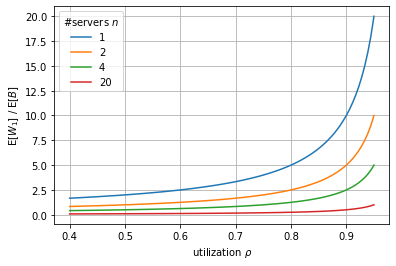

In [22]:
def meanQueueLength(a,n):
    rho = a/n
    return pw(a,n)*rho/(1.0-rho)

def EW(a,n,lam):
    return meanQueueLength(a, n)/lam

def EW1(a,n,lam):
    rho = a/n
    return rho/(1.0-rho)/lam

myn = [1,2,4,20]
rhos = np.linspace(0.4,0.95,101)
lam = 1


for k,n in enumerate(myn):    
    a = rhos*n
    EB = a/lam
    plt.plot(rhos, EW1(a,n,lam)/EB, label=n)

plt.xlabel('utilization $\\rho$')
plt.ylabel('$\mathrm{E}[W_1]~/~\mathrm{E}[B]$')
plt.grid(which='major')
plt.legend(title='#servers $n$');